In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [86]:
pd.set_option('display.expand_frame_repr', False) #prevent line breaks in dataframe print

Load dataset

In [65]:
orig_df = pd.read_csv('../dataset/team_A_dataset.csv')

#all columns with NANs
print(orig_df.columns[orig_df.isna().any()].tolist()) 

#replacing NANs with zeros
df = orig_df.fillna(0)

['general_thefts', 'break_in_thefts', 'celkem', 'm_do_65', 'z_do_65', 'celkem_w2', 'celkem_w3', 'celkem_w4', 'celkem_w5', 'celkem_w6', 'celkem_w7', 'celkem_w8', 'celkem_w9', 'celkem_w10', 'celkem_w11', 'celkem_w12', 'celkem_w13', 'celkem_w14', 'celkem_w15', 'celkem_w16', 'celkem_w17', 'celkem_w18', 'celkem_w19', 'm_do_65_w2', 'm_do_65_w3', 'm_do_65_w4', 'm_do_65_w5', 'm_do_65_w6', 'm_do_65_w7', 'm_do_65_w8', 'm_do_65_w9', 'm_do_65_w10', 'm_do_65_w11', 'm_do_65_w12', 'm_do_65_w13', 'm_do_65_w14', 'm_do_65_w15', 'm_do_65_w16', 'm_do_65_w17', 'm_do_65_w18', 'm_do_65_w19', 'z_do_65_w2', 'z_do_65_w3', 'z_do_65_w4', 'z_do_65_w5', 'z_do_65_w6', 'z_do_65_w7', 'z_do_65_w8', 'z_do_65_w9', 'z_do_65_w10', 'z_do_65_w11', 'z_do_65_w12', 'z_do_65_w13', 'z_do_65_w14', 'z_do_65_w15', 'z_do_65_w16', 'z_do_65_w17', 'z_do_65_w18', 'z_do_65_w19']


Aggregate over kraje

In [124]:
avg_cols =  ['avg_monthly_salary', 'monthly_min_wage', 'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance', 'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price']

avg_df = orig_df.groupby(['month', 'year'], as_index=False)[avg_cols].mean()

sum_cols = ['general_thefts', 'break_in_thefts', 'uchazeciOZamestnaniUoZ', 'noveHlaseniUchazeci', 'noveHlasenaAUvolnenaVPM', 'obsazenaAZrusenaVPM', 'absolventiSkolAMladistvi', 'z_do_65_w19', 'm_do_65_w19', 'celkem_w19']

sum_df = orig_df.groupby(['month', 'year'], as_index=False)[sum_cols].sum()

df = pd.merge(avg_df, sum_df, on=['month', 'year'])

df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')

df = df.set_index('date')
df = df.sort_index()

df = df.drop(columns=['month', 'year'])

df.tail(5)

,avg_monthly_salary,monthly_min_wage,monthly_inflation_rate_wrt_last_year,reer,bilance,avg_energy_price,avg_gasoline_price,avg_natural_gas_price,general_thefts,break_in_thefts,uchazeciOZamestnaniUoZ,noveHlaseniUchazeci,noveHlasenaAUvolnenaVPM,obsazenaAZrusenaVPM,absolventiSkolAMladistvi,z_do_65_w19,m_do_65_w19,celkem_w19
date,,,,,,,,,,,,,,,,,,
2023-05-01,1079.714286,17300.0,11.1,117.36,9.370,150.59,1.6911,2.3395,14835.0,14118.0,253893,32704,24652,23490,11499,149692.0,82353.0,338797.0
2023-06-01,1079.714286,17300.0,9.7,117.36,19.236,150.19,1.6982,2.4959,17750.0,16585.0,249792,31568,21643,20645,9512,153834.0,84692.0,347221.0
2023-07-01,1071.357143,17300.0,8.8,115.41,-6.421,156.26,1.7325,2.6531,20864.0,19098.0,258933,36676,19292,20355,9928,158260.0,87720.0,357205.0
2023-08-01,1071.357143,17300.0,8.5,115.41,-5.628,152.26,1.7791,2.6613,24127.0,21561.0,260803,34643,19894,24314,10795,161187.0,89998.0,363900.0
2023-09-01,1071.357143,17300.0,6.9,115.41,11.874,138.98,1.7623,2.7372,27083.0,23855.0,263020,47778,18687,17899,16894,164537.0,92435.0,371024.0


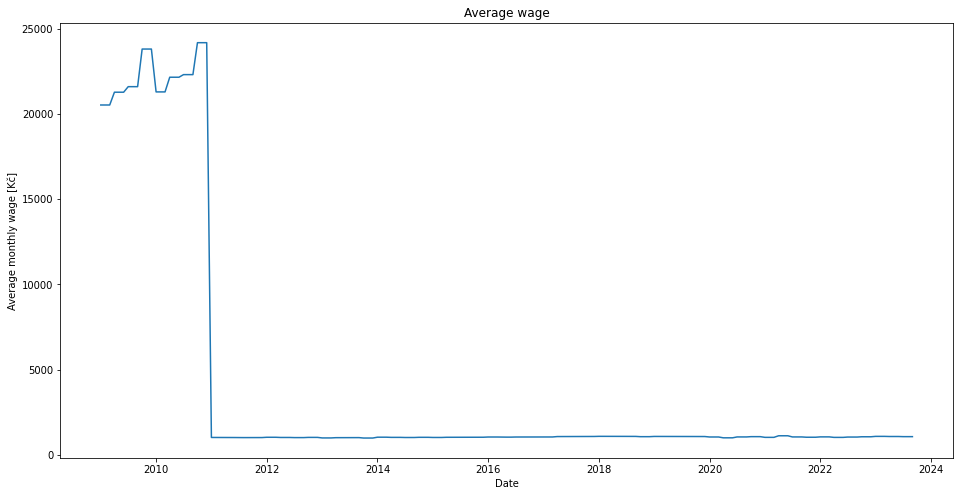

In [109]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['avg_monthly_salary'])
plt.title("Average wage") 
plt.xlabel("Date")
plt.ylabel("Average monthly wage [Kč]");

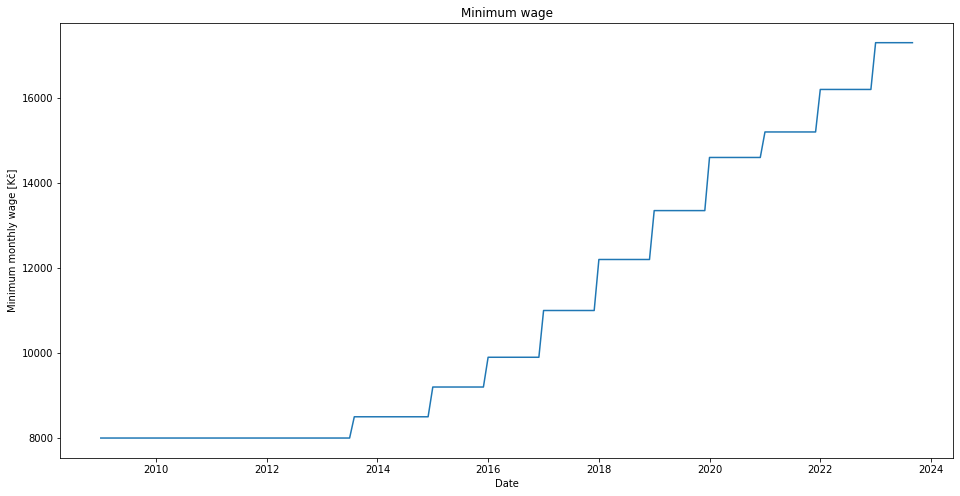

In [110]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['monthly_min_wage'])
plt.title("Minimum wage") 
plt.xlabel("Date")
plt.ylabel("Minimum monthly wage [Kč]");

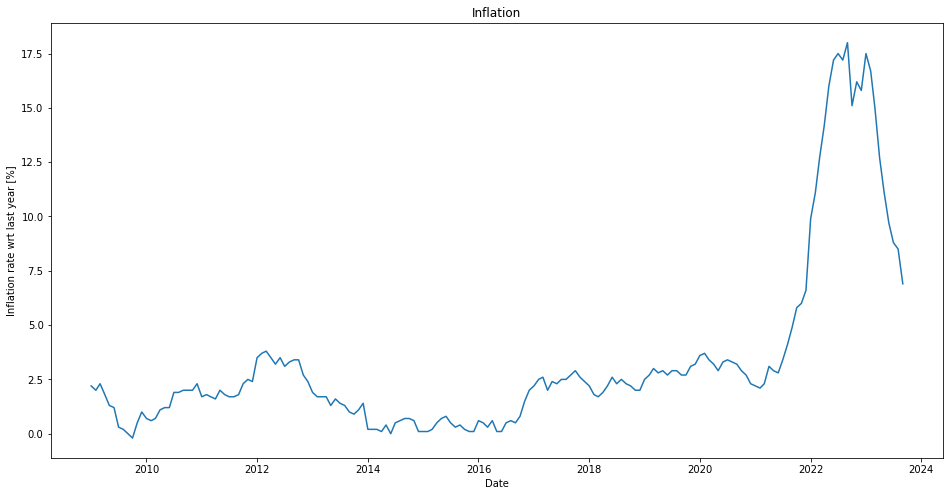

In [111]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['monthly_inflation_rate_wrt_last_year'])
plt.title("Inflation") 
plt.xlabel("Date")
plt.ylabel("Inflation rate wrt last year [%]");

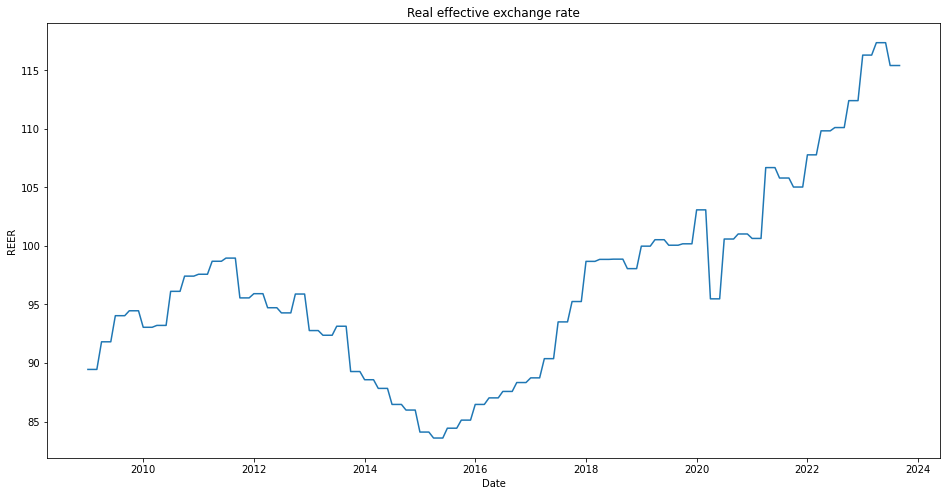

In [114]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['reer'])
plt.title("Real effective exchange rate") 
plt.xlabel("Date")
plt.ylabel("REER");

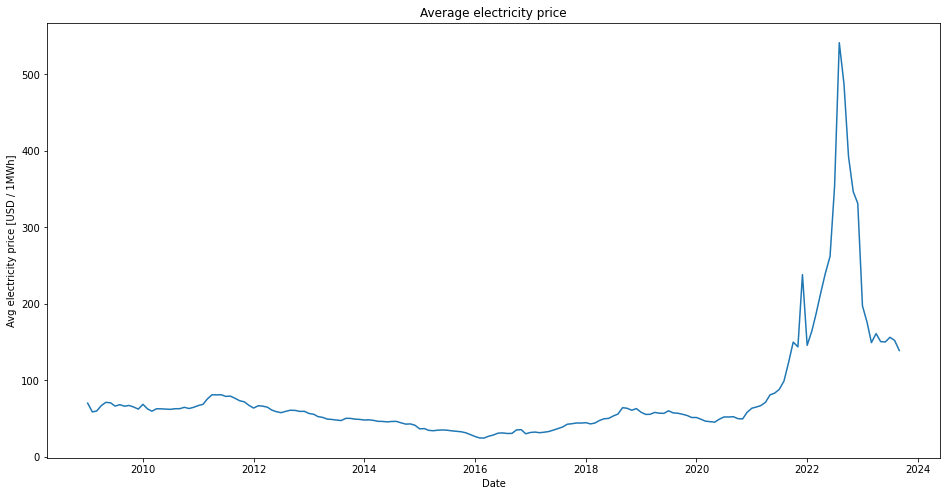

In [117]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['avg_energy_price'])
plt.title("Average electricity price") 
plt.xlabel("Date")
plt.ylabel("Avg electricity price [USD / 1MWh]");

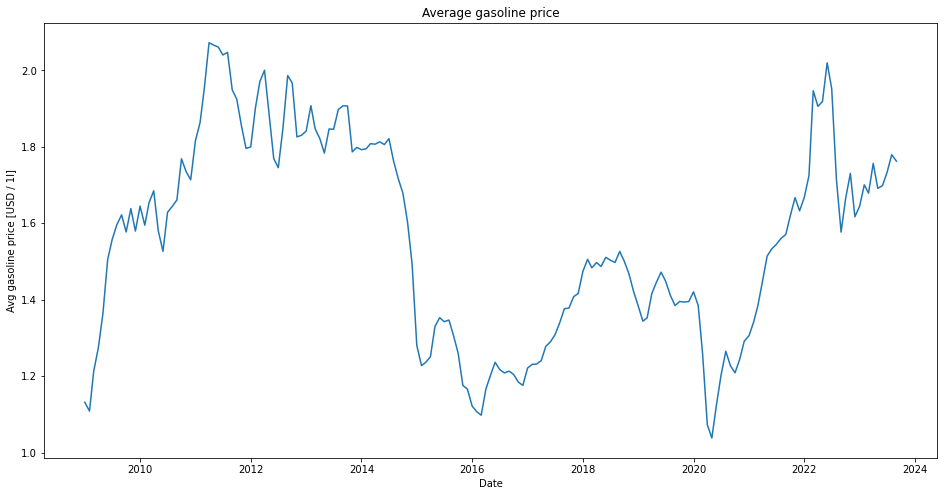

In [118]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['avg_gasoline_price'])
plt.title("Average gasoline price") 
plt.xlabel("Date")
plt.ylabel("Avg gasoline price [USD / 1l]");

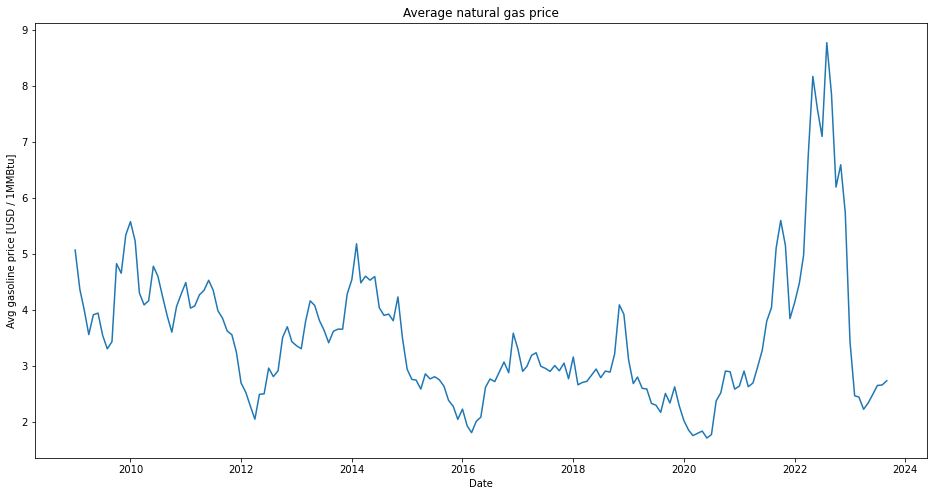

In [119]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['avg_natural_gas_price']);
plt.title("Average natural gas price") 
plt.xlabel("Date")
plt.ylabel("Avg gasoline price [USD / 1MMBtu]");

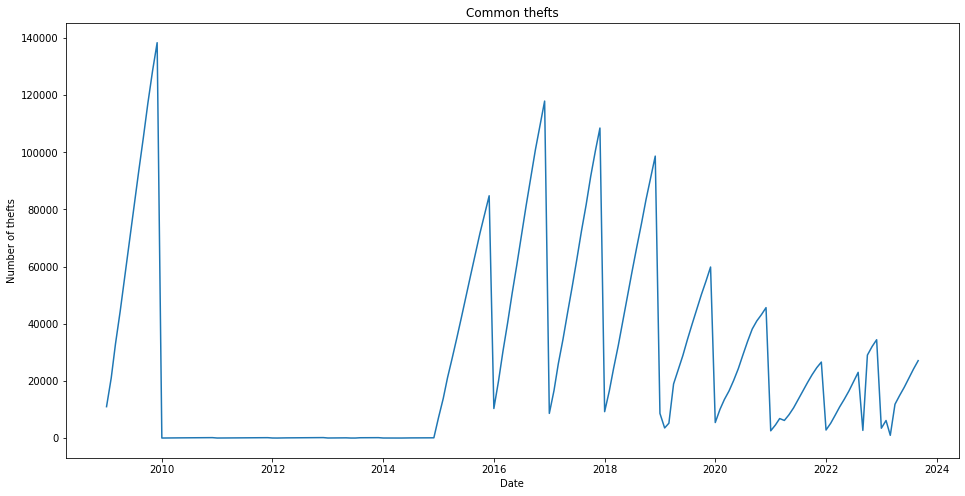

In [121]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['general_thefts'])
plt.title("Common thefts") 
plt.xlabel("Date")
plt.ylabel("Number of thefts");

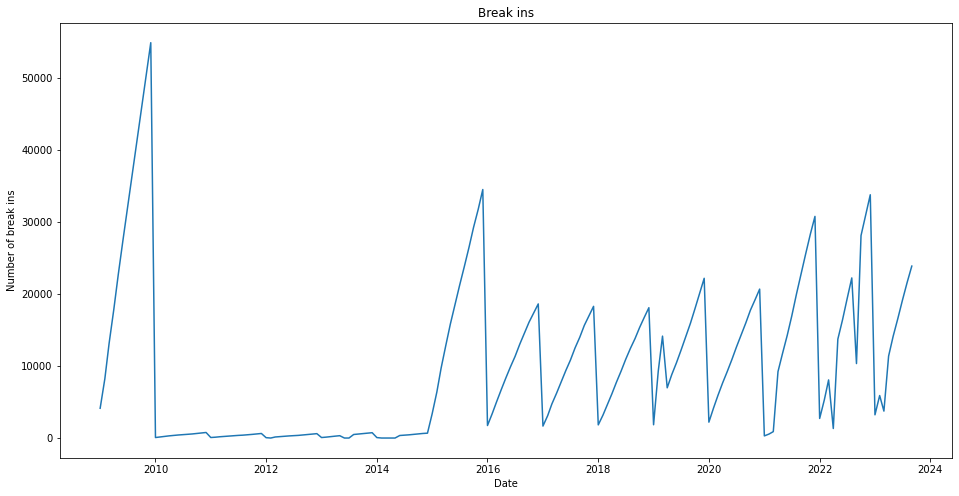

In [122]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['break_in_thefts'])
plt.title("Break ins") 
plt.xlabel("Date")
plt.ylabel("Number of break ins");

# TODO FOR SLEEKY VIKI

'bilance', 'uchazeciOZamestnaniUoZ',
'noveHlaseniUchazeci', 'noveHlasenaAUvolnenaVPM', 'obsazenaAZrusenaVPM',
'absolventiSkolAMladistvi', 'z_do_65_w19', 'm_do_65_w19', 'celkem_w19'